# Example: Using `SpectrumProcessor` for Spectral Analysis

This notebook demonstrates the use of the `SpectrumProcessor` class from the `ADCPySpec` package to compute and visualize the power spectrum of a synthetic velocity signal.

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ADCPySpec.spectrum import SpectrumProcessor

## Generate Synthetic Velocity Data

In [7]:
# Time array
dt = 1.0  # time step (s)
N = 1024  # number of samples
t = np.arange(N) * dt

# Create a synthetic velocity signal: sum of two sine waves + noise
freq1 = 0.05  # Hz
freq2 = 0.15  # Hz
u = 2 * np.sin(2 * np.pi * freq1 * t) + 1 * np.sin(2 * np.pi * freq2 * t) + 0.5 * np.random.randn(N)

## Compute the Power Spectrum

In [11]:
# Initialize SpectrumProcessor
spec_proc = SpectrumProcessor(x=t, y1=u, win='hann')

# Compute the spectrum
freqs, Su = spec_proc.compute_one_signal_spectrum()

# Only keep the positive frequencies
pos_mask = freqs >= 0
freqs = freqs[pos_mask]
Su = Su[pos_mask]

## Plot the Power Spectrum

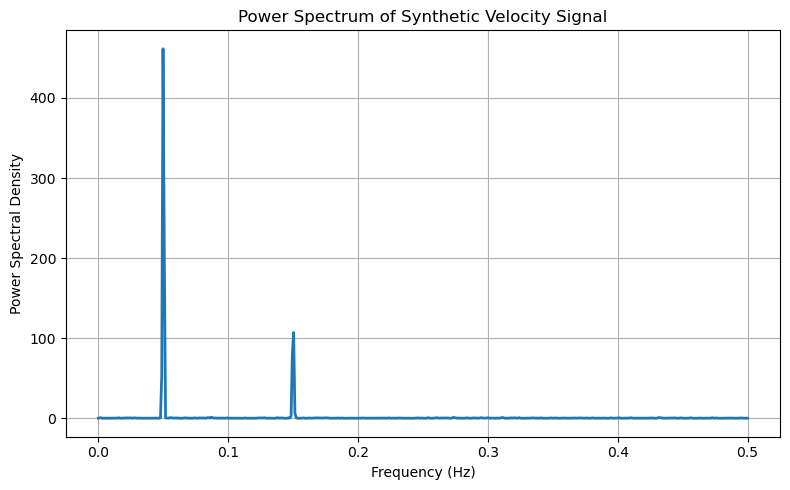

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(freqs, Su, lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectrum of Synthetic Velocity Signal')
plt.grid()
plt.tight_layout()
plt.show()